This notebook is created to analyse simple correlations between entailment measures and human intution. Simply specify the file you want to analyse and run the remaining code.

In [38]:
data_file_location = "../data/output/p_entails_not_p(normalized).csv"

In [39]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import nltk
from nltk.corpus import wordnet as wn

from operations.composition import *
from operations.similarity_measures import *
from operations.logical_negation import *
from operations.worldly_context_creation import *
from operations.helpers import *

import pandas as pd
import matplotlib.pyplot as plt

import pickle
import csv
import random


from matplotlib.lines import Line2D 
from matplotlib.ticker import MaxNLocator

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/benjaminrodatz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
file = []
df = None

with open(data_file_location, newline='') as csvfile:
        # with open('df_i4_all_idneg.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            test = row
            file.append(row)

        df = pd.DataFrame(file[1:])
        df.columns = file[0]


In [41]:
# convert the rows after row 5 to numeric.
# It is assumed that these only contain numbers which can then be compared to the human rating.
# This cell prints all rows which have been found and will eventually be compared to the human rating.

df["MEANRATING"] = pd.to_numeric(df["MEANRATING"])
for col in df.columns[5:]:
    print(col)
    df[col] = pd.to_numeric(df[col])
    


4_baseline_trace
4_baseline_BA
4_baseline_kE1
4_baseline_kE2
4_baseline_khyp1
4_baseline_khyp2
4_worldly_context_trace
4_worldly_context_BA
4_worldly_context_kE1
4_worldly_context_kE2
4_worldly_context_khyp1
4_worldly_context_khyp2
4_negated_trace
4_negated_BA
4_negated_kE1
4_negated_kE2
4_negated_khyp1
4_negated_khyp2
4_negated_scaled_trace
4_negated_scaled_BA
4_negated_scaled_kE1
4_negated_scaled_kE2
4_negated_scaled_khyp1
4_negated_scaled_khyp2
4_negated_hyp_trace
4_negated_hyp_BA
4_negated_hyp_kE1
4_negated_hyp_kE2
4_negated_hyp_khyp1
4_negated_hyp_khyp2
4_negated_hyp_scaled_trace
4_negated_hyp_scaled_BA
4_negated_hyp_scaled_kE1
4_negated_hyp_scaled_kE2
4_negated_hyp_scaled_khyp1
4_negated_hyp_scaled_khyp2
4_wc_minux_hyp_trace
4_wc_minux_hyp_BA
4_wc_minux_hyp_kE1
4_wc_minux_hyp_kE2
4_wc_minux_hyp_khyp1
4_wc_minux_hyp_khyp2
4_wc_minux_hyp_scaled_trace
4_wc_minux_hyp_scaled_BA
4_wc_minux_hyp_scaled_kE1
4_wc_minux_hyp_scaled_kE2
4_wc_minux_hyp_scaled_khyp1
4_wc_minux_hyp_scaled_khyp2


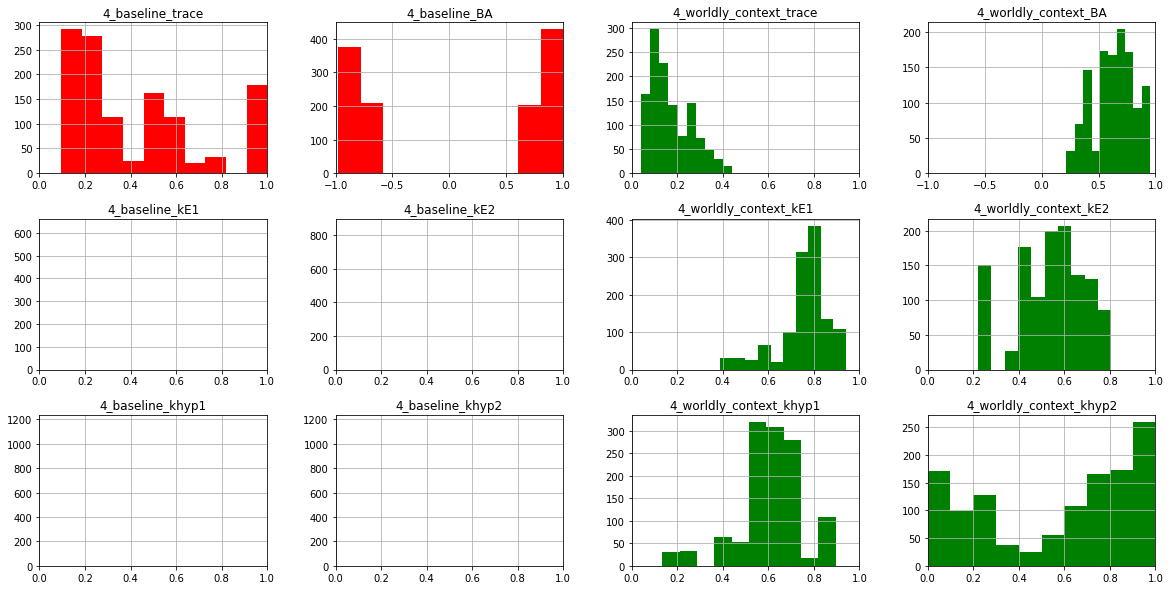

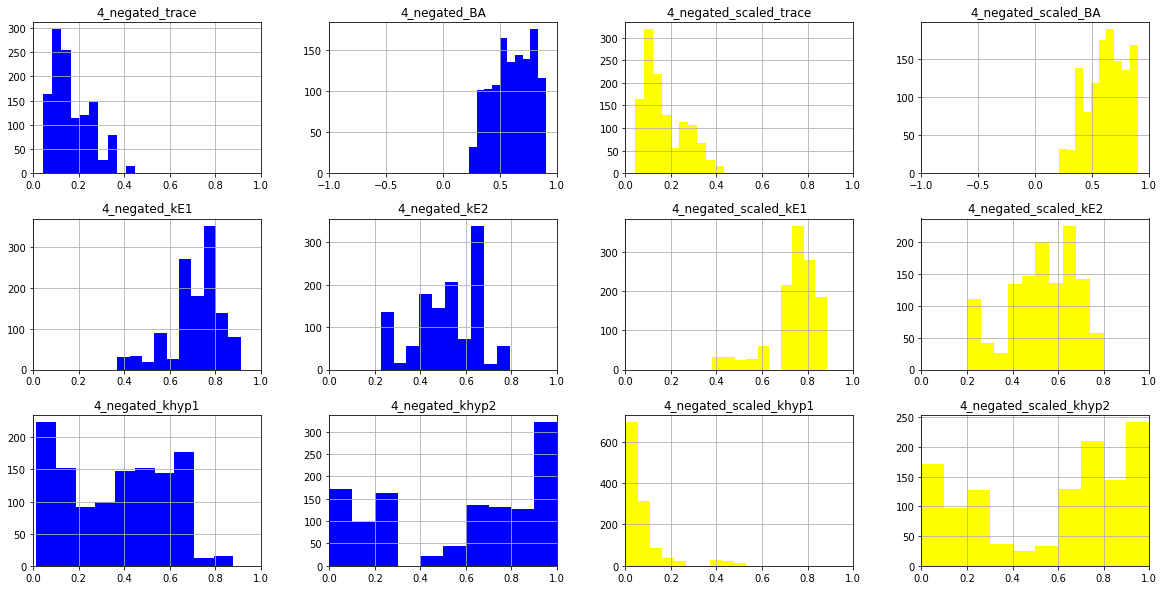

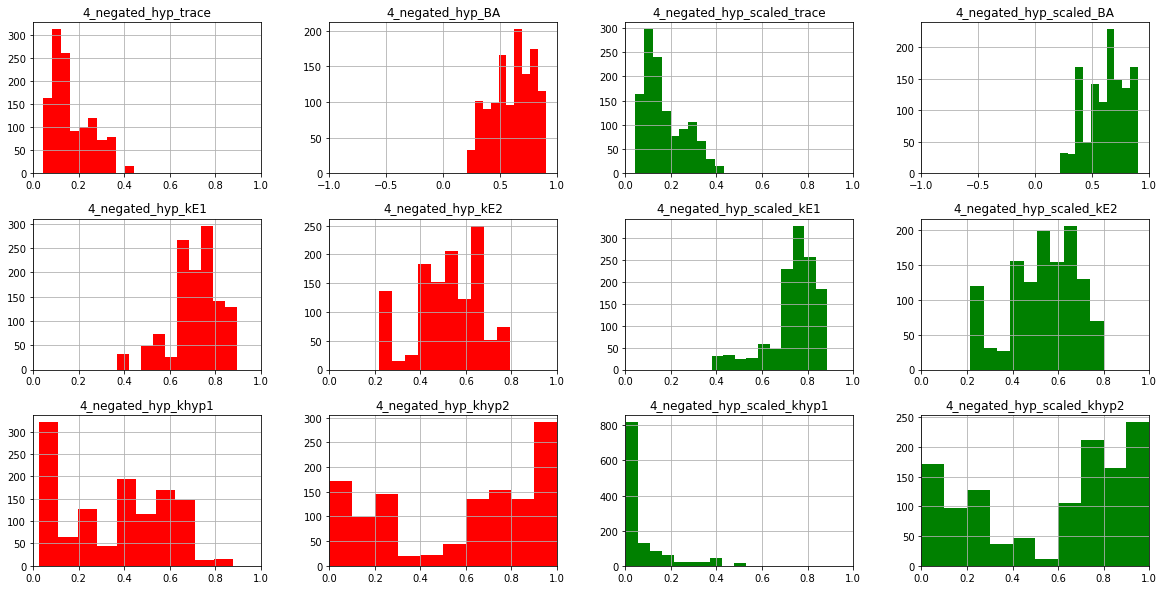

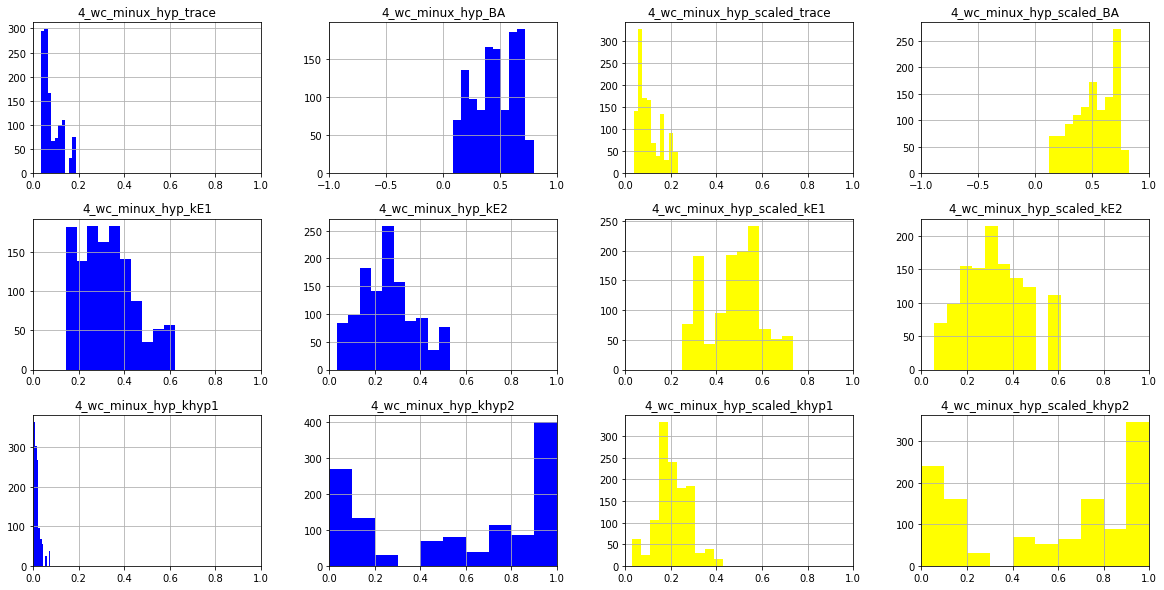

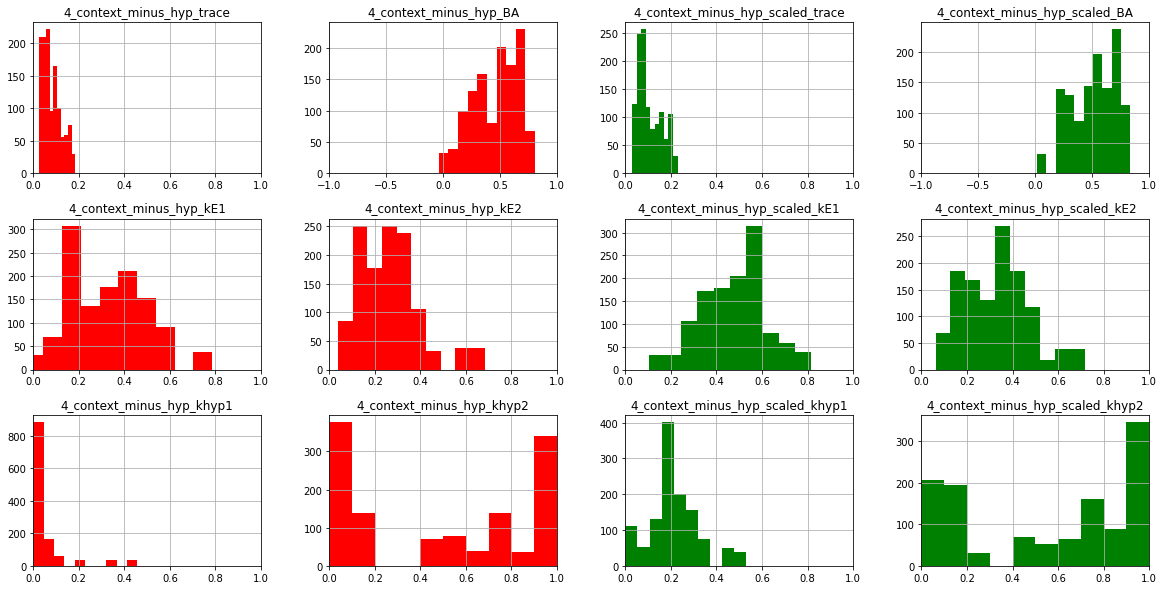

In [42]:
counter = 0

colors = ['red', 'green', 'blue', 'yellow']
columns = ['4_negated', '4_negated_scaled', 
            '4_negated_hyp', '4_negated_hyp_scaled'
            '4_wc_minux_hyp', '4_wc_minux_hyp_scaled'
            '4_context_minus_hyp', '4_context_minus_hyp_scaled']
for col in df.columns[5:]:        
    if "" in col:
        if counter % 12 == 0:
            fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
            
        y = int(counter / 6) % 2
            
        axis = ax[int((counter % 6) / 2), (counter % 6) % 2 + y * 2]
        
        axis.set_xlim(0, 1)
        if "BA" in col:
            axis.set_xlim(-1, 1)
        df.hist(column=col, ax = axis, color=colors[(int(counter / 6)) % 4])
        
        counter += 1


In [31]:
df['4_context_minus_hyp_scaled_kE1']

0       0.331793
1       0.380719
2       0.687978
3       0.441222
4       0.385129
          ...   
1226    0.482767
1227    0.580008
1228    0.620664
1229    0.675522
1230    0.392271
Name: 4_context_minus_hyp_scaled_kE1, Length: 1231, dtype: float64